# Algoritmo Neareast Neighbors (KNN)
## Introducción.
```{index} Neareast Neighbors 
```

[sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) proporciona funcionalidad para métodos de aprendizaje tanto supervisados como no supervisados basados en la información que proporcionan los vecinos más próximos.el método basado en los vecinos más cercanos no supervisados son la base de muchos otros métodos de aprendizaje, especialmente el aprendizaje múltiple y la agrupación espectral. El aprendizaje basado en vecinos supervisados tiene dos variantes: clasificación para datos con etiquetas discretas y regresión para datos con etiquetas continuas.

El principio en el que se basan los métodos del vecino más cercano es encontrar un número predefinido de muestras de entrenamiento más cercanas en distancia al nuevo punto, y predecir la etiqueta a partir de ellas. El número de muestras puede ser una constante definida por el usuario (aprendizaje del vecino más cercano k), o variar en función de la densidad local de puntos (aprendizaje del vecino basado en el radio). La distancia puede ser, en general, cualquier medida métrica: la distancia euclidiana estándar es la opción más común. Los métodos basados en los vecinos se conocen como métodos de aprendizaje automático no generalizadores, ya que simplemente "recuerdan" todos sus datos de entrenamiento (posiblemente transformados en una estructura de indexación rápida, como un árbol de bolas ([Ball Tree](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree)) o un árbol KD ([KD tree](https://scikit-learn.org/stable/modules/neighbors.html#kd-tree))).


A pesar de su simplicidad, los vecinos más cercanos han tenido éxito en un gran número de problemas de clasificación y regresión, incluyendo dígitos escritos a mano y escenas de imágenes de satélite. Al ser un método no paramétrico, suele tener éxito en situaciones de clasificación en las que el límite de decisión es muy irregular.

La clase  sklearn.neighbors puede manejar matrices NumPy o scipy.sparse como entrada. Para las matrices densas, se admite un gran número de métricas de distancia posibles. Para las matrices dispersas, se admiten métricas de Minkowski arbitrarias para las búsquedas.

Para ver las diferencias entre KD tree y Ball Tree, [visitar este enlace](https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940).

A pesar de que estos métodos basados en la información que facilitan los vecinos más cercanos, se han incluido en el gran apartado dedicado al aprendizaje supervisado, dada que esta clase agrupa tanto métodos supervisados como no supervisado, se ha creído conveniente incluir los dos grandes tipos de aprendizaje en este capítulo, con la finalidad de ver las posibilidades que ofrece la clase sklearn.neighbors de Scikit Learn. Comenzamos con los métodos no supervisados.

## Métodos no supervisados

La clase [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) implementa el aprendizaje no supervisado de los vecinos más cercanos. Actúa como una interfaz uniforme para tres diferentes algoritmos de vecinos más cercanos: BallTree, KDTree, y un algoritmo de fuerza bruta basado en las rutinas de sklearn.metrics.pairwise. La elección del algoritmo de búsqueda de vecinos se controla a través del parámetro 'algorithm', que debe ser un valor dentro  de los siguientes: ['auto', 'ball_tree', 'kd_tree', 'brute']. Cuando se pasa el valor por defecto 'auto', el algoritmo intenta determinar la mejor aproximación a partir de los datos de entrenamiento. Para una discusión de los puntos fuertes y débiles de cada opción, [vea Algoritmos de Vecino más Cercano](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms).

A continuación se muestra un ejemplo de utilización de este método.

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2],[5,6]])
# n_neighbors indica el número de vecinos más cercanos
# Que queremos localizar para cada punto
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)


print("Índices: \n",indices)

print("\nDistancias: \n",distances)

Índices: 
 [[0 1 2]
 [1 0 2]
 [2 1 0]
 [3 4 5]
 [4 3 5]
 [5 4 3]
 [6 5 4]]

Distancias: 
 [[0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]
 [0.         1.         2.23606798]
 [0.         1.         1.41421356]
 [0.         1.41421356 2.23606798]
 [0.         4.47213595 5.83095189]]


En la primera salida, se muestran los puntos ( en este caso 3 porque así lo hemos indicado en la utilización del algoritmo) más cercanos entre sí.

En la segunda salida, se muestran las distancias del primer punto al resto. POr eso el primero valor vale cero, porque es la distancia de un punto a él mismo.

Como el conjunto de consulta coincide con el conjunto de entrenamiento, el vecino más cercano de cada punto es el propio punto, a una distancia de cero.

También es posible producir eficazmente un gráfico disperso que muestre las conexiones entre los puntos vecinos:

In [2]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.]])

El conjunto de datos está estructurado de manera que los puntos cercanos en el orden de los índices están cerca en el espacio de los parámetros, lo que conduce a una matriz aproximadamente diagonal de bloques de los vecinos más cercanos. Este tipo de gráfico disperso es útil en una variedad de circunstancias que hacen uso de las relaciones espaciales entre los puntos para el aprendizaje no supervisado: en particular, véase [Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap), [LocallyLinearEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding) y [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering).

### Clases KDTree y BallTree.

```{index} KDTree, BallTree
```

Como alternativa, se pueden utilizar las clases KDTree o BallTree directamente para encontrar los vecinos más cercanos. Esta es la funcionalidad que envuelve la clase NearestNeighbors utilizada anteriormente. El Ball Tree y el KDTree tienen la misma interfaz; aquí mostraremos un ejemplo de uso del KDTree:

In [3]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

Consulte la documentación de las clases [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) y [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree) para obtener más información sobre las opciones disponibles para las búsquedas de vecinos más cercanos, incluida la especificación de estrategias de consulta, métricas de distancia, etc. Para obtener una lista de métricas disponibles, consulte la documentación de la clase [DistanceMetric](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric).

## Métodos supervisados.

K-Nearest Neighbours ( normalmente denominado KNN) es un algoritmo  de aprendizaje automático sencillo pero muy utilizado en la práctica. En los métodos supervisados, se puede usar tanto para la clasificación de un elemento como para hacer modelos de regresión.  KNN agrupa los datos en clusters o subconjuntos coherentes y clasifica los nuevos datos introducidos en función de su similitud con los datos previamente entrenados.

El dato de entrada se asigna a la clase con la que comparte el mayor número de vecinos más cercanos ( de aquí viene su nombre).

El algoritmo K-Nearest-Neighbours, es un algoritmo del que  se puede decir que es un algoritmo de clasificación no paramétrico, es decir, no hace ninguna presunción sobre la distribución del conjunto de datos base sobre el que se entrena el modelo.

Al algoritmo KNN también se le denomina **algoritmo de aprendizaje perezoso ( lazy learner algorithm)** porque no aprende del conjunto de entrenamiento inmediatamente, sino que almacena el conjunto de datos y, cuando se va a hecer la clasificación, realiza la acción necesaria para resolver el problema en el conjunto de datos. En la fase de entrenamiento sólo se encarga de almacenar los datos que se utilizan para entrenar ( motivo por el cual requiere una gran cantidad de memoria para volúmenes importantes de datos) y cuando obtiene nuevos datos, los clasifica en una categoría que es muy similar a los nuevos datos.

Un ejemplo de aplicación de este tipo de procedimientos puede ser el siguiente. Según datos históricos de una determinada entidad bancaria, se podrían clasificar los clientes en base a morosos o no morosos, en base a los diversos conjuntos de datos almacenados, previamente. Si aparece un nuevo cliente a solicitar un préstamos, se le pueden solicitar los datos de las variables que han servido para elaborar el modelo, y en base la predicción realizada con esta metodología, se le podría tratar de una u otra manera. 

En la siguiente figura se puede ver de forma gráfica lo comentado en estas líneas. 



En la siguiente tabla, se presentan las ventajas e inconvenientes más significativos de esta tecnología.



|Ventajas                                            |Inconvenientes                        |
|--------------------------------------------------- |--------------------------------------|
|Fácil de implementar                  | Hay que seleccionar bien el valor k de vecinos a usar |
|No necesita suponer distribución de los datos | La fase de clasificación es lenta |
|La fase de entrenamientos suele ser rápida|No admite datos ausentes |


Como los métodos que utilizan este tipo de algoritmos están basados en las distancias entre los punto, en el siguiente enlace se pueden ver algunas cuestiones muy interesantes sobre las mismas y en relación con este algoritmo.

https://ichi.pro/es/tipos-de-metricas-de-distancia-y-uso-de-metricas-de-distancia-definidas-por-el-usuario-en-el-algoritmo-knn-de-172716170298257

### ¿ Cómo funciona este algoritmo?

Con este procedimiento de clasificación, lo que se busca es obtener un voto mayoritario de pertenencia a una clase, emitido por los vecinos más próximos, los cuales se determinan mediante una adecuada función de distancia. 

En consecuencia de lo que se trata es de lo siguiente: se tienen una serie de instancias observadas anteriormente, y cada una de esas instancias conformadas por una serie de observaciones más otra variable de clasificación. Entonces dada una nueva instancia que no se conoce a la clase a la que pertenece, pero sí los valores que tienen el resto de las variables independientes, lo que se trata es calcular o inferir a que clase pertenece. Para conseguir este objetivo lo que se buscan son lo k vecinos más próximos, y entonces utilizando un sistema de votación mayoritario, se asignaría  esa nueva observación a la clase más votada.

Veamos esto con un simple ejemplo utilizando unos pocos datos que figuran en el fichero excel que se ha elaborado al efecto y que se muestran en la siguiente figura.


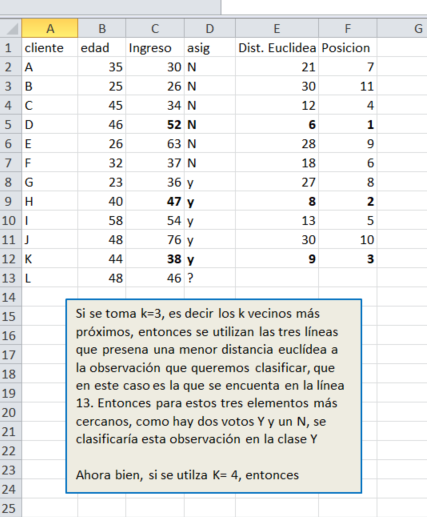

En el ejemplo ficticio anterior, se han colocado en la hoja excell un total de 12 personas, las primeras once tienen datos de edad e ingresos ( en miles de euros) y la clase a la que pertenecen ( columna asig) . La duodécima persona, tan sólo tiene datos de edad e ingresos y se quiere inferir cual es la clase más probable a la que pertenece. Para obtener este resultado, se ha calculado la distancia euclidea que hay entre el valor que queremos clasificar y las otras 11 observaciones ( tomando los valores de la variables edad e ingreso). En la columna "Dist. Euclidea", se han anotado estas distancias. Si empleamos el criterio de los tres vecinos más próximos, que se han señalado en el gráfico anterior con sendas flechas, podemos ver que uno votaría N y los otros dos Y, por lo tanto mediante este sistema de votación mayoritario, el último dato, se clasificaría en la categoría Y. Sin embargo, el problema se tiene si se utiliza k = 4 pues en este caso se producirá un empate.

Para evitar este problema de empates, se suele utilizar como criterio, intentar utilizar un valor de k impar y en el caso de utilizar un valor par y producirse este empate, entonces se suelen utilizar normas heurísticas para deshacer este empate, como por ejemplo seleccionar la clase que contiene al vecino más próximo, seleccionar la clase con la distancia media menor, etc.

Como ya se ha comentado al comienzo de este apartado, el algoritmo KNN también se utiliza para resolver problemas de  regresión, aunque en menor medida que para clasificar, en este caso, en lugar de elegir la clase más votada entre los k puntos más cercanos, lo que se hace es calcular la media o mediana de las respuestas ( o variable dependiente) que tienen los k puntos más cercanos al que se quiere predecir el valor de la regresión.

### Distintas clases de distancias utilizadas.

Como ya se ha visto un elemento muy importante que influye es la decisión final de este clasificador es la distancia utilizada. En este sentido se puede decir que en función de los atributos con los que se trabaja, las distancias más utilizada son la euclídea, si los datos son numéricos, y la segunda se utiliza si los atributos son de tipo nominal o binarios.

```{index} distancia euclídea
```

Veamos en primer lugar cómo definir la **distancia euclídea**. Supongamos que disponemos de dos vectores numéricos $x=(x_1,x_2,...,x_n)$ e $y=(y_1,y_2,...,y_n)$, entonces se define la distancia o norma euclídea como:

$$d(x,y) = \sum_{i=1}^{n}(x_{i}-y_{i})^{2}$$

```{index} distancia de Hamming
```

Por lo que respecta a la **distancia de Hamming**, se define de la siguiente manera:

$$dh(y,x_{i})=\sum_{j=1}^{k}\delta(x_{j},x_{ij}) $$

Donde la distancia individual $\delta$, se define como:

$$\delta(x_{j},x_{ij})=\begin{cases}
1 & si\ x_{j}=x_{ij}\\0 & si \ x_{j}\neq x_{ij} \end{cases}$$

En python se puede calcular la distancia de Hamming, utilizando la biblioteca scipy.spatial.distance. Para ver cómo se pude obtener su valor, hay que tener presente inicialmente que este método devuelve el porcentaje de elementos coincidentes de dos matrices, por lo tanto para obtener el número de elementos coincidentes ( que es lo que realmente mide la distancia de Haamming), lo que hay que hacer es multiplicar por el número total de elementos de las dos matrices. A continuación se puede ver un sencillo ejemplo, sobre su cálculo. 

In [4]:
from scipy.spatial.distance import hamming

a = [1,2,0,2]
b = [1,3,0,3]
hamming([1,2,0,2],[1,3,0,3])*len(a)

2.0

**NOTA**: Esta distancia de Hamming se puede utilizar también para comparar dos cadenas de caracteres y ver si las mismas son similares o difieren sustancialmente. La biblioteca de Python anteriormente referenciada también permite calcular esta distancia para dos matrices que contienen caracteres individuales, como se puede ver a continuación. 

In [5]:
#definimos dos matrices de caracteres
x = ['x', 'b', 'c', 'd']
y = ['a', 'b', 'c', 'r']

#calculamos la distancia de Hamming entre las dos matrices
#es decir calculamos el número de caracteres donde difieren
hamming (x, y) * len (x)

2.0

### Otras distancias.

A pesar de que las distancias comentadas en los párrafos anteriores, son las más comunes y utilizadas en la práctica diaria, no son las únicas, y a continuación se va a proceder a exponer alguna más muy utilizada en la ciencia estadística en general.

#### Distancia de Minkowski:

```{index} distancia de Minkowski
```

La fórmula matemática que caracteriza esta distancia es la siguiente:

$$d(x,y)=\left(\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|^{p}\right)^{1/p}$$

Cuando se tiene que p = 1, entonces se obtiene la fórmula que caracteriza a la **distancia de Manhattan**:

$$dis.\ Manhattan=\left(\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|\right)$$

#### similitud y distancia de coseno.

```{index} distancia de coseno
```

Con esta métrica se intenta medir la similitud que hay entre dos vectores de datos, midiendo para ello el coseno que forman esos dos vectores. Entonces si el ángulo es cero ( si los dos son similares) entonces el valor del coseno es 1 y en este caso se tendrá que las dos observaciones son muy similares. Esta similitud se define de la siguiente forma:

$$similitud=\frac{A\cdot B}{\left\Vert A\right\Vert \cdot\left\Vert B\right\Vert }=\frac{\sum A_{i}\cdot B_{i}}{\sqrt{\sum A_{i}^{2}}\cdot\sqrt{\sum B_{i}^{2}}}$$

Y entonces en base a esa medida de similitud, se define la **distancia coseno como 1-similitud coseno**.

Scikit learn utiliza el método KNeighborsClassifier para hacer este tipo de clasificaciones, y entre sus parámetros se encuentra "metric" que permite definir la métrica que se quiere utilizar. Estas posibles distancias, se [pueden ver en este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric). 

Pero también se pueden definir funciones para definir distancias no contempladas en la implementación de Scikit Learn, como por ejemplo la que se define con la función que se puede ver en el siguiente código:  

In [6]:
def funcion_distancia(v1, v2):
    """
    Definición de una distancia en python
    """
    total = 0
    for xi, yi in zip(v1, v2):
        min_val = min(xi, yi)
        max_val = max(xi, yi)
        if min_val >= 0:
            total += 1 - (1 + min_val)/(1 + max_val)
        else:
            total += 1 - (1 + min_val + abs(min_val))/(1 + max_val + abs(max_val))
    return total

funcion_distancia([0,0,1,0,1],[1,1,0,1,0])

2.5

Entonces si yo quisiera utilizar esa función de distancia dentro de Scikip learn, no tendría más que utilizar el siguiente código:

<code>
 knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', metric = funcion_distancia)   
</code>

El psudocódigo que se utilizaría para este algoritmo sería el siguiente:
<pre>
    COMIENZO
    Entrada: D = {(x1,y1),(x2,y2),...,(xn,yn)}
        x = nuevo objeto a clasificar
    Para todo objeto ya clasificado (xi,yi)
        calcular d(x,xi)
    Ordenar forma ascendente di ( i =1,2,...n)
    Nos quedamos con los k casos ya clasificados más cercanos a x
    Asignar x a la clase más frecuente de los k casos localizados en paso anterior
    FIN
</pre>


### Variantes al sistema de clasificación general.

Existen algunas variantes a este algoritmo que intentan mejorar el sistema de clasificación general ya comentado anteriormente. Estas variantes, se puede ver en el siguiente enlace:

 http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t9knn.pdf

### Cómo seleccionar k.

No existe un criterio único, para seleccionar el "mejor valor de k", pero si existen diversos criterios que pueden ayudar a la hora de tomar esta decisión. Uno de estos criterios puede ser calcular la precisión del modelo (para los valores de prueba) para diferentes valores de k y hacer un gráfico que cruce el valor de k y la precisión alcanzada y elegir el primer k que maximice esos valores. Para obtener la precisión de un modelo, se puede utilizar la propiedad "score()" de scikit learn. A continuación se incluyen unas pocas líneas de código que muestran cómo poder hacerlo:

<code>
    knn = KNeighborsClassifier(n_neighbors)
    ......
    knn.score(X_test, y_test)
</code>

Otra posibilidad es utilizar curvas de error, tanto para los valores de entrenamiento como de prueba y observar las curvas obtenidas. Un ejemplo de esto lo podemos ver en la siguiente figura:

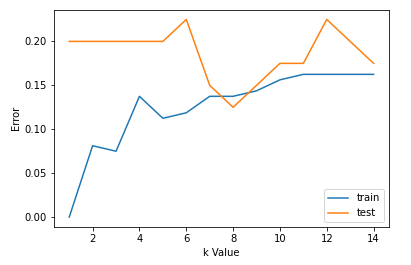

Como podemos ver en esta figura, un valor bajo de k implicaría un sobreajuste  y una alta variabilidad, en este caso el error de entrenamiento es muy bajo, pero en el test sube considerablemente. Tener presente que si k=1 en el caso de entrenamiento el error siempre es cero porque el único punto que se elije como vecino más próximo es el mismo punto. 

A medida que k aumenta, el error del test va disminuyendo hasta un determinado valor de k, a partir del cual el error vuelve a aumentar. Entonces se puede aceptar un valor de k en el cual el cual error del test se estabiliza  y se hace mínimo. En el ejemplo anterior se podría aceptar k=8.No obstante y para evitar tomar decisiones de empates de los datos, conviene tomar un valor de k impar.

Un posible código para implementar este tipo de gráficas podría ser el siguiente:

<code>
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()    
</code>


### Implementación el algoritmo en python.

Como ya se ha comentado anteriormente, este algoritmo no es difícil de implementar y por lo tanto se podrían escribir sin mucha dificultad una serie de líneas de código que nos  faciliten la solución de este problema sin necesidad de utilizar la librería de Scikit Learn.

Una posible implementación del mismo se puede ver en los siguientes enlaces:

* http://openaccess.uoc.edu/webapps/o2/bitstream/10609/90946/6/jaluquegTFM0219memoria.pdf


* https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761


### Clasificación con Nearest Neighbors.

La clasificación basada en los vecinos próximos es un tipo de aprendizaje basado en instancias o aprendizaje no generalizador: no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de una simple votación mayoritaria de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene más representantes dentro de los vecinos más cercanos del punto.

scikit-learn implementa dos clasificadores diferentes de vecinos más cercanos: **KNeighborsClassifier** implementa el aprendizaje basado en los k vecinos más cercanos de cada punto de consulta, donde k es un valor entero especificado por el usuario. **RadiusNeighborsClassifier** implementa el aprendizaje basado en el número de vecinos dentro de un radio fijo r de cada punto de entrenamiento, donde r es un valor de punto flotante especificado por el usuario.

La clasificación por vecinos en K-NeighborsClassifier es la técnica más utilizada. La elección óptima del valor k depende en gran medida de los datos: en general, un valor mayor suprime los efectos del ruido, pero hace que los límites de la clasificación sean menos nítidos.

En los casos en los que los datos no están muestreados uniformemente, la clasificación de vecinos basada en radios en RadiusNeighborsClassifier puede ser una mejor opción. El usuario especifica un radio fijo r, de manera que los puntos de los vecindarios más dispersos utilizan menos vecinos más cercanos para la clasificación. Para los espacios de parámetros de alta dimensión, este método se vuelve menos eficaz debido a la llamada "maldición de la dimensionalidad".

La clasificación básica de vecinos más cercanos utiliza ponderaciones uniformes: es decir, el valor asignado a un punto de consulta se calcula a partir de un voto mayoritario simple de los vecinos más cercanos. *En algunas circunstancias, es mejor ponderar los vecinos de forma que los más cercanos contribuyan más al ajuste*. Esto puede lograrse mediante la palabra clave weights. El valor por defecto, weights = 'uniform', asigna pesos uniformes a cada vecino. weights = 'distance' asigna pesos proporcionales a la inversa de la distancia al punto de consulta. Alternativamente, se puede proporcionar una función definida por el usuario de la distancia para calcular los pesos.

A continuación se muestra un ejemplo con estas diferencias en pesos

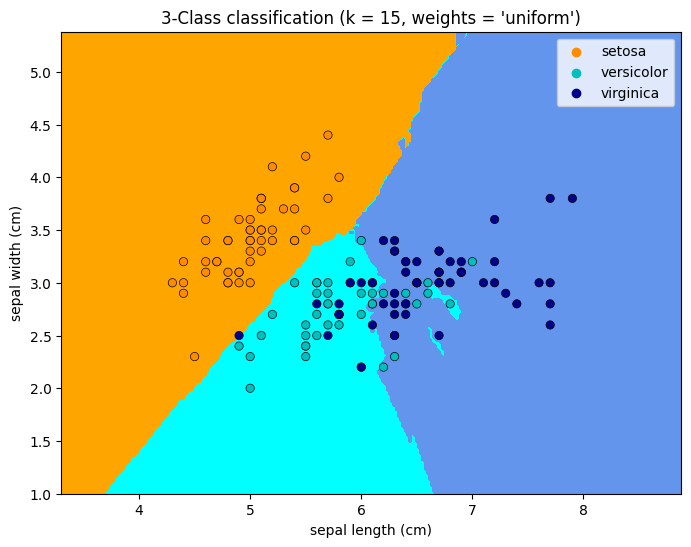

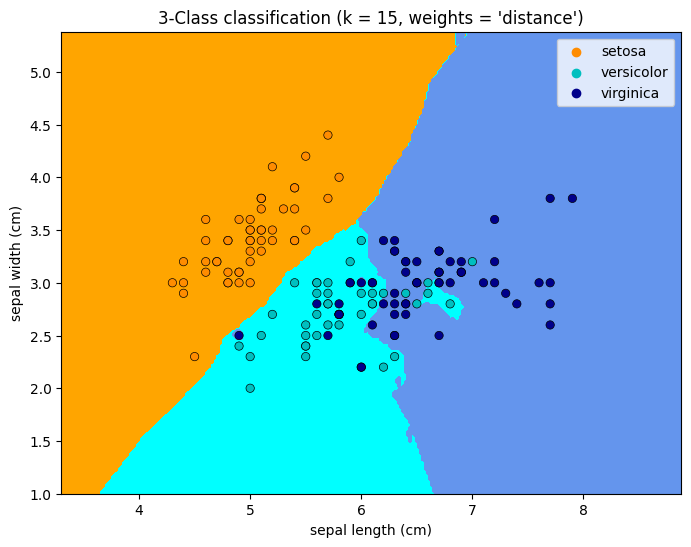

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

###  Otro ejemplo práctico.

En este apartado se va a proceder a realizar un ejemplo práctico, sobre el uso de esta herramienta con la biblioteca de Python Scikit learn. En primer lugar es preciso matizar que desde esta biblioteca y con el módulo denominado sklearn.neighbors, se pueden trabajar tanto en modelos supervisados, como con modelos no supervisados. Un resumen de todos estos modelos, se pueden [ver en este enlace](https://scikit-learn.org/stable/modules/neighbors.html).

Estos últimos modelos no son objeto de este tema, pero para el lector interesado, se puede decir que existen para ello tres algoritmos desarrollados en Scikit learn: BallTree, KDTree y el denomiando de fuerza bruta.

Respecto de los algoritmos supervisados, se puede decir que se pueden utilizar tanto para regresión como para clasificación. Para la regresión Scikit learn ofrece dos implementaciones: *KNeighborsRegressor* y  *RadiusNeighborsRegressor*. 

Lo que interesa realmente en este apartado es la posibilidad de utilizar el algoritmo KNN para hacer clasificaciones, para ello Scikit learn ofrece dos métodos diferentes:  [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) ( que sería el que implementa el método desarrollado en apartados anteriores), y también [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier), que se basa en utilizar los vecinos más próximos dentro de un determinado radio.

A continuación procedemos a desarrollar un ejemplo comprensivo de las posibilidades con las que podemos operar con Scikip learn.

En primer lugar crearemos una serie de puntos con la clase [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) con dos conjuntos posibles bien distinguidos.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

n_puntos = 200
semilla = 150
X, y = make_blobs(n_samples = n_puntos, random_state = semilla, 
                  centers = 2,cluster_std = 3.5)

Veamos a continuación cómo están distribuidos los puntos generados, distinguiendo por un color diferente la pertenencia a una u otra clase.

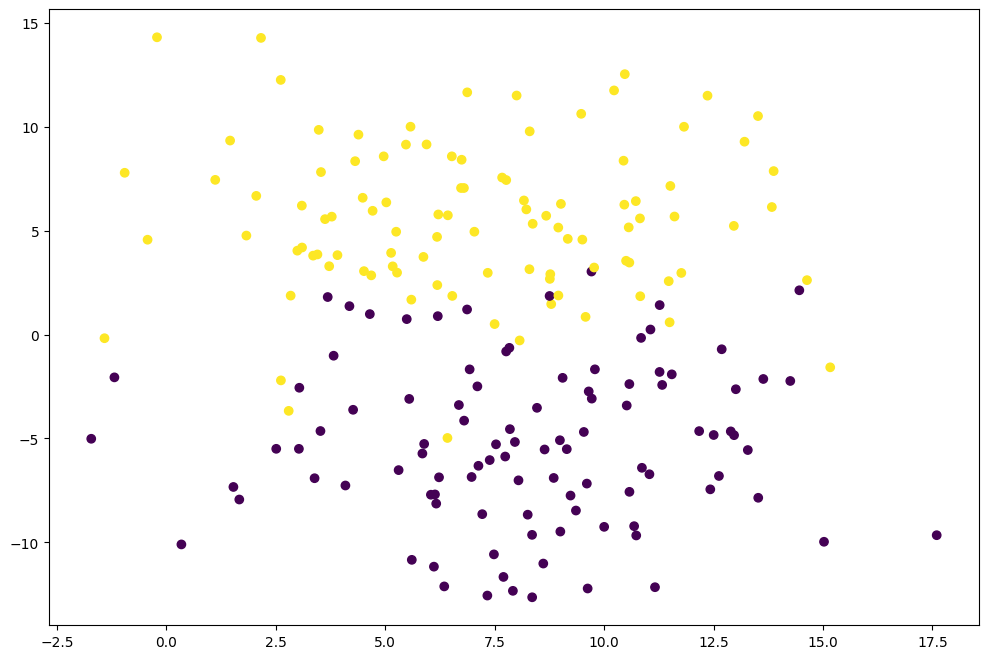

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=y)

Procedemos a continuación a normalizar los valores, a fin de evitar problemas derivados de la escala en la clasificación.

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [11]:
# comprobamos que la media es cero y la varianza 1
X_scaled.mean(axis=0)

array([6.53921362e-16, 2.83106871e-17])

In [12]:
X_scaled.std(axis=0)

array([1., 1.])

Ahora procedemos a obtener los datos de entrenamiento y los datos de test, mediante el siguiente código.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0)

In [14]:
# comprobemos se han obtenido el 80% para train
(len(X_train)/len(X_scaled))*100

80.0

Ahora ya podemos aplicar la clase KNeighborsClassifier, pero previamente vamos a ver cual es el valor de k más adecuado. Lo haremos con dos procedimietos:

El primero consiste en calcular los errores cometidos tanto en la muestra de entrenamiento como de prueba.

Trabajando para k=1
Trabajando para k=2
Trabajando para k=3
Trabajando para k=4
Trabajando para k=5
Trabajando para k=6
Trabajando para k=7
Trabajando para k=8
Trabajando para k=9
Trabajando para k=10
Trabajando para k=11
Trabajando para k=12
Trabajando para k=13
Trabajando para k=14


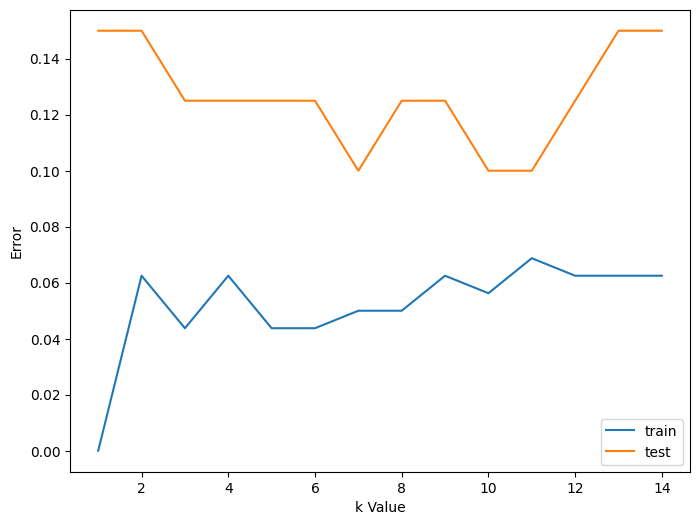

In [15]:
from sklearn.neighbors import  KNeighborsClassifier
plt.figure(figsize=(8,6))
error1= []
error2= []
for k in range(1,15):
    print("Trabajando para k={}".format(k))
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

Como puede verse en este gráfico, el primer valor del conjunto test que minimiza el error sería para k= 7 que además es impar y será el valor con el que inicialmente podríamos trabajar.

Otro procedimiento consiste en aplicar el siguiente procedimiento:

([<matplotlib.axis.XTick at 0x19ef1a33640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

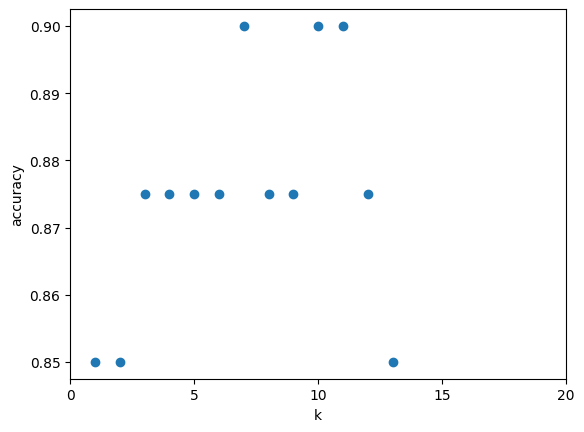

In [16]:
k_range = range(1, 14)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Con este método también podemos ver que el valor de k que mejora el score es 7 que confirma lo que ya habíamos obtenido anteriormente. Por lo tanto procedemos a entrenar el modelo con el valor de k = 7.

Elegido el valor de k procedemos al entrenamiento del modelo

In [17]:
valor_k = 7
knn = KNeighborsClassifier(valor_k)
knn.fit(X_train, y_train)
print('La acuracidad en el conjunto de entrenamiento es: {:.2f}'.
        format(knn.score(X_train, y_train)))
print('La acuracidad en el conjunto de test es: {:.2f}'.
        format(knn.score(X_test, y_test)))

La acuracidad en el conjunto de entrenamiento es: 0.95
La acuracidad en el conjunto de test es: 0.90


Como puede verse, obtenemos una precisión de 95% para el conjunto de entrenamiento y del 90% para el test, lo que se puede considerar como un resultado bastante aceptable.

Obtengamos a continuación la matriz de confusión obtenida en base al modelo creado anteriormente.

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

pred = knn.predict(X_test)
print("La matriz de confusión es la siguiente:\n")
print((confusion_matrix(y_test,pred)))
print("Los distintos valores de ajuste del modelo son:\n")
print(classification_report(y_test, pred))

La matriz de confusión es la siguiente:

[[19  1]
 [ 3 17]]
Los distintos valores de ajuste del modelo son:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



A continuación vamos a hacer un ejercicio de representación gráfica, para ver cómo quedan las regiones de clasificación del modelo, con lo cual nos facilita la interpretación de donde pueden caer las predicciones. Es preciso tener en cuenta que esta representación gráfica la podemos hacer porque sólo tenemos dos variables en las que basar la clasificación, si tuviéramos más sería más complejo hacer este tipo de representaciones e incluso la conclusiones se deberán hacer en base a los resultados numéricos del modelo.

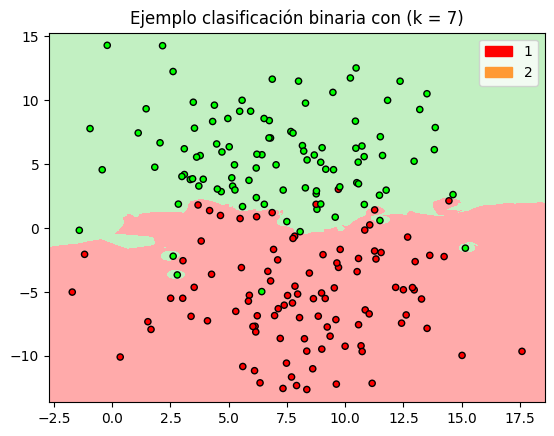

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

h = 0.02 # es el paso de la rejilla

#Creamos los mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# Creamos una instancia del clasificador y ajustamos los datos
clf = KNeighborsClassifier(valor_k, weights='distance')
clf.fit(X, y)

# Dibujamos la frontera de decisión. Para ello asignamos un color to each
# a cada punto de la rejilla dependiendo donde corrsponde ese punto.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# ponemos el resultado en el color que corresponde
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Dibujamos los puntos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')

plt.legend(handles=[patch0, patch1])

plt.title("Ejemplo clasificación binaria con (k = %i)"
              % (valor_k))
 
plt.show()

## Uso de GridSearchCV.

En apartados anteriores, se ha utilizado código ac hoc  para determinar el valor del hiperparámetro k, pero scikit learn ofrece un método para poder hacer esto y que sirve no sólo para la clasificación KNN que se ha desarrollado anteriormente, sino también para cualquier otra herramienta de clasificación o regresión, pues lo que hace es repetir el procesamiento que se indique con la finalidad de encontrar los hiperparámetros que minimizan el error a la hora de hacer un determinado ajuste. Nos estamos refiriendo al método GridSearchCV, que se puede ver [en este enlace](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

En nuestro caso concreto, vamos utilizar esta facilidad que nos ofrece Scikit Learn a fin de localizar cual sería el mejor valor de K utilizando este método. Veamos esto con el siguiente ejemplo.

In [20]:
from sklearn.model_selection import GridSearchCV

parametros ={
    'n_neighbors': range(1,15)
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    parametros,
    cv = 2,
    n_jobs = -1
)

resultados = gs.fit(X_train, y_train)

En este sencillo ejemplo, tan sólo nos vamos a fijar en un sólo hiperperámetro de KNeighborsClassifier, que indica el número de vecinos más próximos a tener en cuenta ( existen más hiperparámetros para este metodo que se pueden ver en la documentación oficial de Scikit learn.

Para este caso concreto, definimos el único hiperparámetro que queremos ajustar mediante un diccionario python que se ha denominado parametros. Después creamos una instancia de GridSearchCV, y se le indica lo siguiente:

KNeighborsClassifier(). Para indicar que se utiliza este procedimeinto.

parametros. Es el diccionario previamente creado

cv=2. Para indicar que en sus pruebas utilice una cross-validación de tamaño 2

n_jobs = -1. Para indicar que utilice programación en paralelo y utilice todos los "procesadores" disponibles

Utilizando este procedimiento podemos usar su resultado para obtener diferentes valores optimizados de la herramienta que se quiere utilizar. Las posibles salidas se muestran a continuación.

In [21]:
print("Obtención del score: ")
print(resultados.best_score_)
print("\nDatos del estimador a utilizar")
print(resultados.best_estimator_)
print("\nMejor parámetro estimado: ")
print(resultados.best_params_)

Obtención del score: 
0.94375

Datos del estimador a utilizar
KNeighborsClassifier(n_neighbors=7)

Mejor parámetro estimado: 
{'n_neighbors': 7}


## Regresión Nearest Neighbors

La regresión basada en los vecinos puede utilizarse en los casos en que las etiquetas de los datos son variables continuas y no discretas. La etiqueta asignada a un punto de consulta se calcula a partir de la media de las etiquetas de sus vecinos más cercanos.

scikit-learn implementa dos regresores de vecinos diferentes: 

KNeighborsRegressor implementa el aprendizaje basado en los k vecinos más cercanos de cada punto de consulta, donde k es un valor entero especificado por el usuario.

RadiusNeighborsRegressor implementa el aprendizaje basado en los vecinos dentro de un radio fijo del punto de consulta, donde r es un valor de punto flotante especificado por el usuario.

La regresión básica de vecinos más cercanos utiliza ponderaciones uniformes: es decir, cada punto de la vecindad local contribuye uniformemente a la clasificación de un punto de consulta. En algunas circunstancias, puede ser ventajoso ponderar los puntos de manera que los puntos cercanos contribuyan más a la regresión que los puntos lejanos. Esto puede lograrse mediante la palabra clave pesos. El valor por defecto, weigths = 'uniform', asigna pesos iguales a todos los puntos. weights = 'distance' asigna pesos proporcionales a la inversa de la distancia al punto de consulta. Alternativamente, se puede proporcionar una función definida por el usuario de la distancia, que se utilizará para calcular los pesos.

Veamos a continuación un ejemplo: 

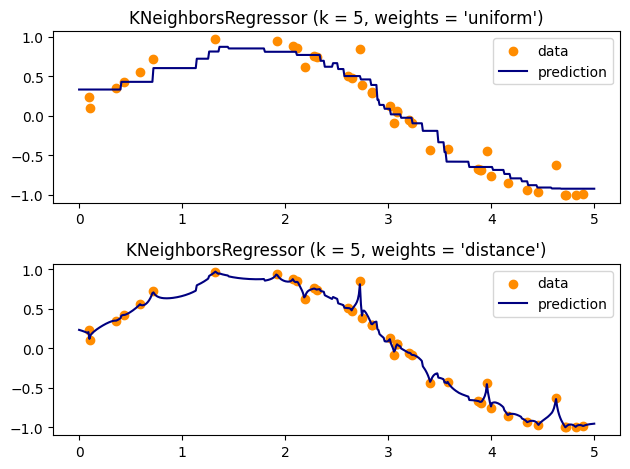

In [22]:
# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

El uso de vecinos más cercanos de múltiples salidas para la regresión se demuestra en el siguiente ejemplo.. En este ejemplo, las entradas X son los píxeles de la mitad superior de las caras y las salidas Y son los píxeles de la mitad inferior de esas caras.



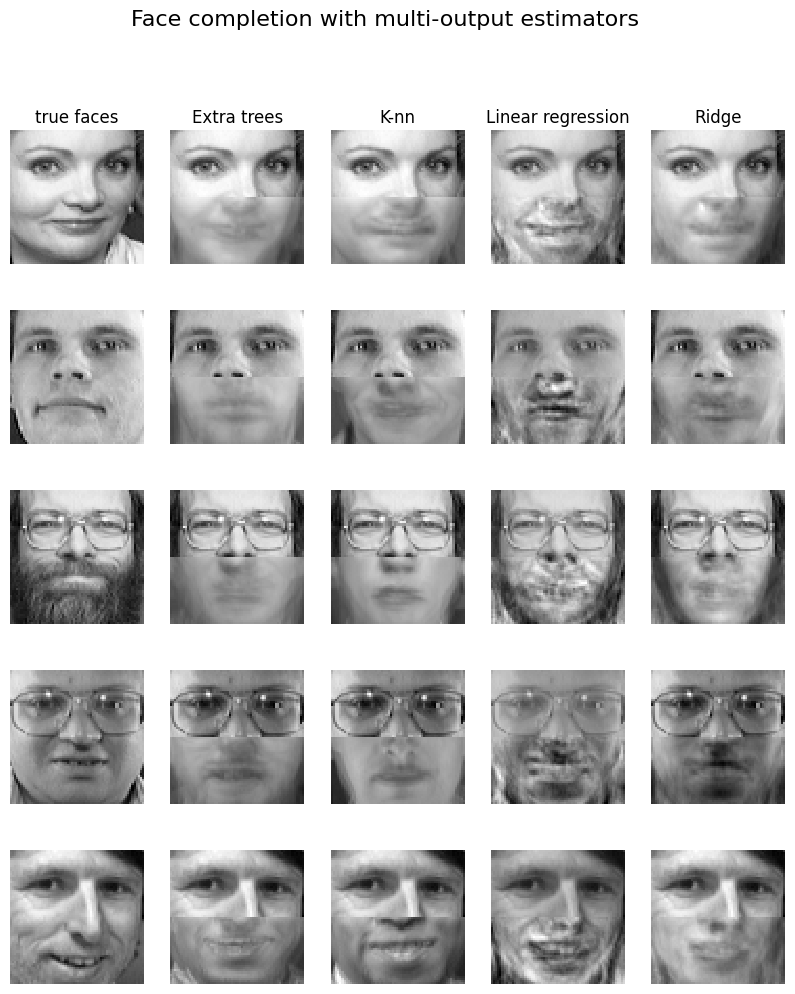

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()